In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
import scipy.stats as sts
%matplotlib inline

In [3]:
df = pd.read_csv('C:\\Users\\Dmitry\\Documents\\Учеба\\4 Аналитика для бизнеса\\flat-data.csv')
df = df[['No', 'Rooms','DistMetro','Area','Price']]
df.head()

,No,Rooms,DistMetro,Area,Price
0,1,3,12,56,9396
1,2,2,4,54,9785
2,3,1,2,31,5783
3,4,2,8,48,9123
4,5,1,11,31,5662


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
No           5000 non-null int64
Rooms        5000 non-null int64
DistMetro    5000 non-null int64
Area         5000 non-null int64
Price        5000 non-null int64
dtypes: int64(5)
memory usage: 195.4 KB


#### 1. Построить гистограмму
Постройте гистограммы распределения цен для каждой категории (по количеству комнат).

Какие выводы можно сделать на основе полученных гистограмм?

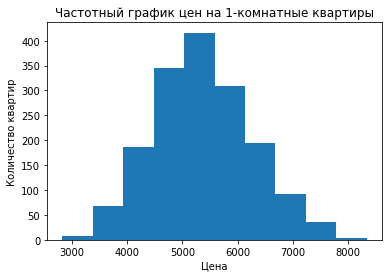

In [7]:
r1 = df[df['Rooms'] == 1]['Price']
plt.hist(r1, 10)
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.title('Частотный график цен на 1-комнатные квартиры')
plt.show()

In [10]:
r1.mean()

5363.285455642728

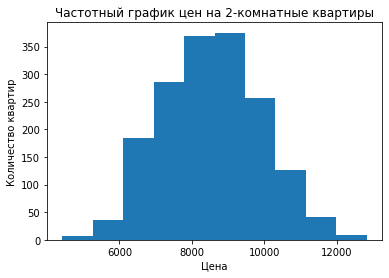

In [8]:
r2 = df[df['Rooms'] == 2]['Price']
plt.hist(r2, 10)
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.title('Частотный график цен на 2-комнатные квартиры')
plt.show()

In [11]:
r2.mean()

8547.268047337278

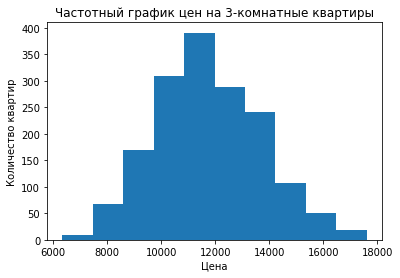

In [9]:
r3 = df[df['Rooms'] == 3]['Price']
plt.hist(r3, 10)
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.title('Частотный график цен на 3-комнатные квартиры')
plt.show()

In [12]:
r3.mean()

11749.978221415608

Распределения являются нормальными. Чем больше комнатность, тем выше цены на квартиры. Средние значения подтверждают это.

#### 2. Оценить корреляцию
Используя знакомые вам методы, дайте оценку корреляции цены и площади квартиры отдельно по каждой категории (по количеству комнат). Какие выводы можно сделать из этой оценки?

In [18]:
corr1 = df[df['Rooms'] == 1]
np.corrcoef(corr1['Price'], corr1['Area'])

array([[1.        , 0.65283123],
       [0.65283123, 1.        ]])

In [19]:
corr2 = df[df['Rooms'] == 2]
np.corrcoef(corr2['Price'], corr2['Area'])

array([[1.        , 0.70581552],
       [0.70581552, 1.        ]])

In [20]:
corr3 = df[df['Rooms'] == 3]
np.corrcoef(corr3['Price'], corr3['Area'])

array([[1.        , 0.74472342],
       [0.74472342, 1.        ]])

С увеличение площади растет цена на квартиру. У всех комнатнатностей заметна корреляция цены и площади, причем у 2-комнатных
и 3-комнатных она высокая. С увеличением комнатности усиливается корреляция.

#### 3. Рассчитать квартили
Рассчитайте границы квартилей распределения цен на 2х квартиры площадью более 40 кв. метров.

In [40]:
r2_40m = df[(df['Rooms'] == 2) & (df['Area'] >40)]['Price']

In [42]:
np.quantile(r2_40m, .25)

7924.0

In [43]:
np.quantile(r2_40m, .5)

8812.0

In [44]:
np.quantile(r2_40m, .75)

9684.5

25% предложений 2-х комнатных квартир площадью более 40 кв. м. стоят менее 7924. Медиана 8812, 25% квартир стоят дороже 9684

#### 4. Решить задачу
Вы являетесь риелтором, ваша прибыль это комиссия 3% от суммы сделки купли-продажи квартир (цена квартиры). В текущем квартале у вас ожидается 25 сделок купли-продажи 3-х комнатных квартир. Оцените вероятность того, что ваша суммарная прибыль от этих продаж превысит 9 млн. 200 тыс.

Решу задачу следующим образом: так как все квартиры стоят по-разному, то я найду среднюю цену на 3-комнатную квартиру, умножу на 25 штук и посчитаю 3% от этой суммы

In [52]:
r3.mean()

11749.978221415608

In [53]:
r3.mean() * 25

293749.4555353902

In [54]:
r3.mean() * 25 * 0.03

8812.483666061706

К сожалению, в данном датасете неизвестны единицы имерения стоимости. Если единицы измереня - это тысячи, то ожидаемый заработок с 25 сделок составит 8 812 483 у.е. Таким образом, ожидаемая выручка не превысит 9.2 млн. Но так как разница между цифрами составляет около 5%, то если продаваемые квартиры будут дороже средней по рынку, то показатель по целевой выручке выполнится. Либо продать больше квартир.

In [78]:
9200 / 0.03 / 25

12266.666666666668

Чтобы выйти на целевой показатель необходимо продать 25 квартир со средней ценой 12 226 тыс.

In [79]:
9200 / 0.03 / r3.mean()

26.09933915517677

Либо продать 26 квартир со средней ценой

#### 5. Решить задачу
Рассчитать дисперсию стоимости кв.метра в каждой категории. Как меняется дисперсия с количеством комнат? Есть ли (и какая) связь с изменением коэффициента корреляции?

In [80]:
np.var(r1)

780035.2950992647

In [81]:
np.var(r2)

1874641.635251218

In [82]:
np.var(r3)

3837755.64017905

C увеличением комнатности увеличивается и диперсия. Это логично т.к. с увеличением комнатности увеличивается и цена на квартиры. Ситуация аналогичная изменению коэффициента корреляции цены и площади. Больше комнатность --> больше цена --> больше отклонение от средней цены.